In [1]:
import os
from sklearn.model_selection import KFold
from joblib import dump

from methods.preprocessing import *
from methods.extract_features import *
from methods.ml import *

In [2]:
train_dir = "../data/fer-2013-data/train"
for dirpath,dirname,filenames in os.walk(train_dir):
    print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath[22:]}")

There are 7 directories and 0 images in train
There are 0 directories and 3995 images in train\angry
There are 0 directories and 436 images in train\disgust
There are 0 directories and 4097 images in train\fear
There are 0 directories and 7215 images in train\happy
There are 0 directories and 4965 images in train\neutral
There are 0 directories and 4830 images in train\sad
There are 0 directories and 3171 images in train\surprise


In [3]:
X_train, y_train = load_dataset(train_dir)
# make it 2D for basic knn_classifier
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

print("Improvement on dataset:")
print("1-Remove disgust directory")
print("2-Limit happy images to 5000\n")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

Improvement on dataset:
1-Remove disgust directory
2-Limit happy images to 5000

X_train shape: (26058, 48, 48)
y_train shape: (26058,)


In [4]:
knn_classifier_basic = KNNClassifier()
knn_classifier_basic.train(X_train=X_train_flattened, y_train=y_train)
dump(knn_classifier_basic, "joblib/knn_classifier_basic.joblib")

['joblib/knn_classifier_basic.joblib']

In [6]:
def find_optimal_k(X, y, feature_method='LBP', max_k=15):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = np.zeros(max_k)
    classifiers = []
    
    # Feature extraction          
    X_features = extract_features(X_train=X, feature_method=feature_method)
    
    for k in range(1, max_k + 1):
        print(f"Evaluating K={k}")
        fold_accuracies = []
        for train_index, test_index in kf.split(X_features):
            X_train_fold, X_test_fold = X_features[train_index], X_features[test_index]
            y_train_fold, y_test_fold = y[train_index], y[test_index]
            
            # Train and evaluate KNN
            knn = KNNClassifier(n_neighbors=k)
            classifiers.append(knn)
            knn.train(X_train_fold, y_train_fold)
            predictions = knn.predict(X_test_fold)
            fold_accuracies.append(accuracy_score(y_test_fold, predictions))
        
        accuracy_scores[k-1] = np.mean(fold_accuracies)
    
    # Plotting
    plt.plot(range(1, max_k + 1), accuracy_scores, marker='o')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Validation Accuracy')
    plt.title('KNN Validation Accuracy for Different K')
    plt.show()
    
    # Return the optimal K (highest accuracy)
    optimal_k = np.argmax(accuracy_scores) + 1
    print(f"Optimal K Value: {optimal_k} with Accuracy: {accuracy_scores[optimal_k-1]}")
    
    # Train and evaluate for optimal KNN    
    return optimal_k, classifiers[optimal_k-1]

Evaluating K=1
Evaluating K=2
Evaluating K=3
Evaluating K=4
Evaluating K=5
Evaluating K=6
Evaluating K=7
Evaluating K=8
Evaluating K=9
Evaluating K=10
Evaluating K=11
Evaluating K=12


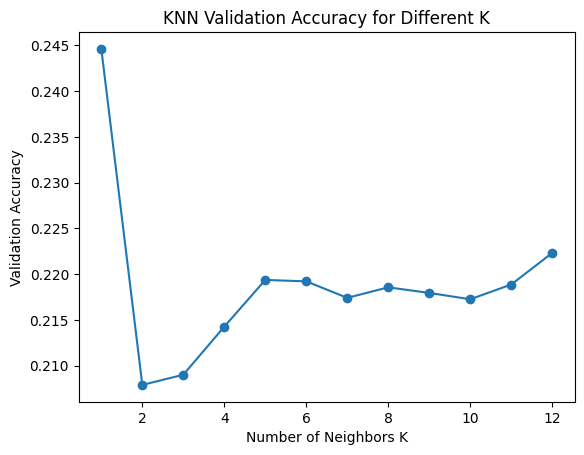

Optimal K Value: 1 with Accuracy: 0.24460837095152485
LBP optimal k: 1


['joblib/knn_classifier_lbp.joblib']

In [7]:
optimal_k, knn_classifier_lbp = find_optimal_k(X_train, y_train, feature_method='LBP', max_k=12)
print("LBP optimal k:", optimal_k)
dump(knn_classifier_lbp, "joblib/knn_classifier_lbp.joblib")

Evaluating K=1
Evaluating K=2
Evaluating K=3
Evaluating K=4
Evaluating K=5
Evaluating K=6
Evaluating K=7
Evaluating K=8
Evaluating K=9
Evaluating K=10
Evaluating K=11
Evaluating K=12


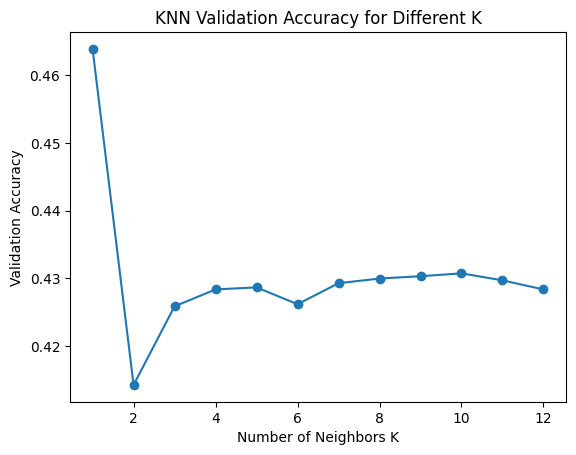

Optimal K Value: 1 with Accuracy: 0.46392645553350825
HOG optimal k: 1


['joblib/knn_classifier_hog.joblib']

In [12]:
optimal_k, knn_classifier_hog = find_optimal_k(X_train, y_train, feature_method='HOG', max_k=12)
print("HOG optimal k:", optimal_k)
dump(knn_classifier_hog, "joblib/knn_classifier_hog.joblib")

Evaluating K=1
Evaluating K=2
Evaluating K=3
Evaluating K=4
Evaluating K=5
Evaluating K=6
Evaluating K=7
Evaluating K=8
Evaluating K=9
Evaluating K=10
Evaluating K=11
Evaluating K=12


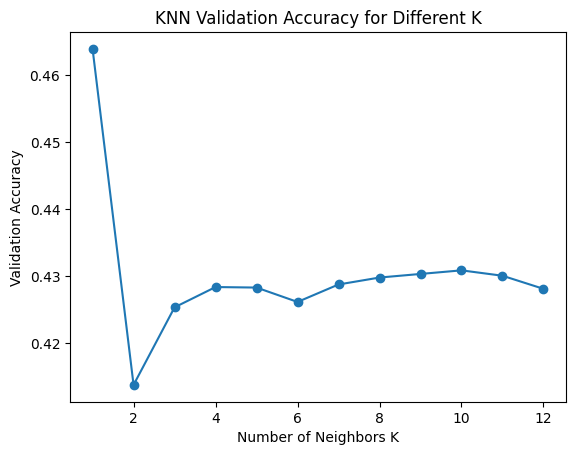

Optimal K Value: 1 with Accuracy: 0.4639264555335082
Combined optimal k: 1


['joblib/knn_classifier_combined.joblib']

In [6]:
optimal_k, knn_classifier_combined = find_optimal_k(X_train, y_train, feature_method='combined', max_k=12)
print("Combined optimal k:", optimal_k)
dump(knn_classifier_combined, "joblib/knn_classifier_combined.joblib")